# LAB 4: K-MEANS CLUSTERING

In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(10)

In [2]:
class Kmeans:
    def __init__(self, n_clusters) -> None:
        self.n_clusters = n_clusters
        self.centroids = None
        self.labels = None
        self.max_iter = 100
        self.iter = 0

    def init_centroids(self, x: np.ndarray) -> None:
        indices = np.random.choice(x.shape[0], self.n_clusters, replace=False)
        self.centroids = x[indices]
    
    def assign_clusters(self, x: np.ndarray) -> np.ndarray:
        d = cdist(x, self.centroids)
        return np.argmin(d, axis=1)
    
    def update_centroids(self, x) -> np.ndarray:
        centroids = np.zeros((self.n_clusters, x.shape[1]))
        for k in range (self.n_clusters):
            x_k = x[self.labels == k]
            centroids[k,:] = np.mean(x_k, axis = 0)
        return centroids

    def has_converged(self, new_centroids: np.ndarray) -> bool:
        return (set([tuple(tmp) for tmp in self.centroids]) == set([tuple(tmp) for tmp in new_centroids]))

    def fit(self, x: np.ndarray) -> None:
        self.init_centroids(x)
        while (self.iter < self.max_iter):
            self.labels = self.assign_clusters(x)
            new_centroids = self.update_centroids(x)

            if self.has_converged(new_centroids):
                break
            
            self.centroids = new_centroids
            self.iter += 1

In [3]:
def display_kmeans(x: np.ndarray, label):
        k = np.amax(label) + 1
        x0 = x[label == 0, :]
        x1 = x[label == 1, :]
        x2 = x[label == 2, :]

        plt.plot(x0[:, 0], x0[:, 1], 'b^', markersize = 4, alpha = .8)
        plt.plot(x1[:, 0], x1[:, 1], 'go', markersize = 4, alpha = .8)
        plt.plot(x2[:, 0], x2[:, 1], 'rs', markersize = 4, alpha = .8)

        plt.axis('equal')
        plt.plot()
        plt.show()

**Assignment 1**

In [19]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 200

x0 = np.random.multivariate_normal(means[0], cov, N)
x1 = np.random.multivariate_normal(means[1], cov, N)
x2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((x0, x1, x2), axis = 0)

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

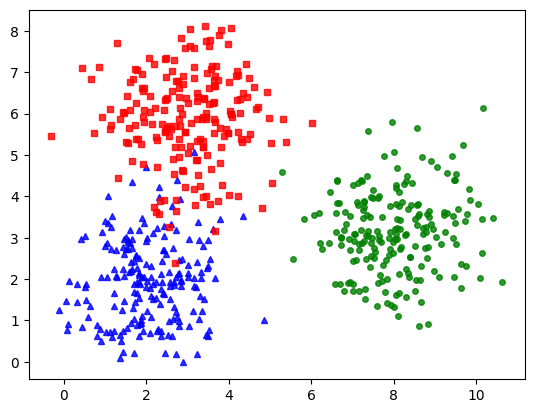

In [20]:
display_kmeans(X, original_label)

In [21]:
kmeans = Kmeans(n_clusters=3)
kmeans.fit(X)

In [22]:
print("Các tâm cụm: ")
print(kmeans.centroids)

Các tâm cụm: 
[[3.03201967 5.93902224]
 [8.02669989 3.14788657]
 [2.05641046 1.96492575]]


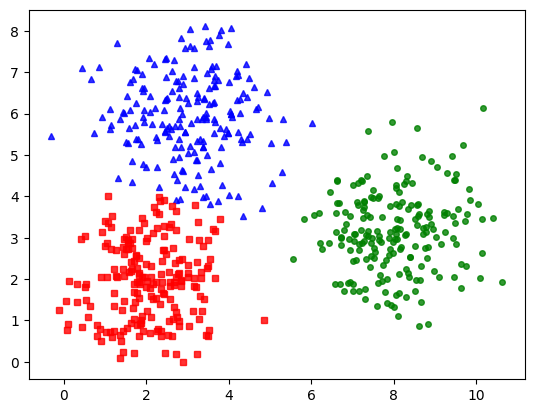

In [23]:
display_kmeans(X, kmeans.labels)

Từ kết quả trên ta có thể thấy thuật toán K-means clustering hoạt động khá tốt, các tâm cụm tìm được có tọa độ khá gần với kỳ vọng ban đầu. Tuy rằng có vẫn còn vài điểm bị phân nhằm cụm nhưng tỉ lệ này thấp nên vẫn có thể chấp nhận được. 

Bên cạnh đó, khi chạy thuật toán nhiều lần ta nhận thấy kết quả có nhiều sự thay đổi. Như vậy việc khởi tạo tâm cụm ngẫu nhiên trong K-means có thể ảnh hưởng lớn đến kết quả cuối cùng do thuật toán dễ hội tụ về các cực tiểu cục bộ khác nhau tùy vào vị trí khởi tạo.

**Assignment 2**

In [9]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

x0 = np.random.multivariate_normal(means[0], cov, 50)
x1 = np.random.multivariate_normal(means[1], cov, 20)
x2 = np.random.multivariate_normal(means[2], cov, 1000)

X = np.concatenate((x0, x1, x2), axis = 0)

original_label = np.asarray([0]*50 + [1]*20 + [2]*1000).T

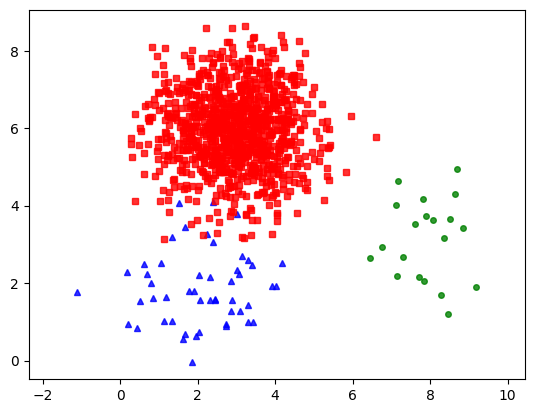

In [10]:
display_kmeans(X, original_label)

In [11]:
kmeans = Kmeans(n_clusters=3)
kmeans.fit(X)

In [12]:
print("Các tâm cụm: ")
print(kmeans.centroids)

Các tâm cụm: 
[[3.06065306 6.44389795]
 [2.60915301 4.42395148]
 [7.37019454 3.53174803]]


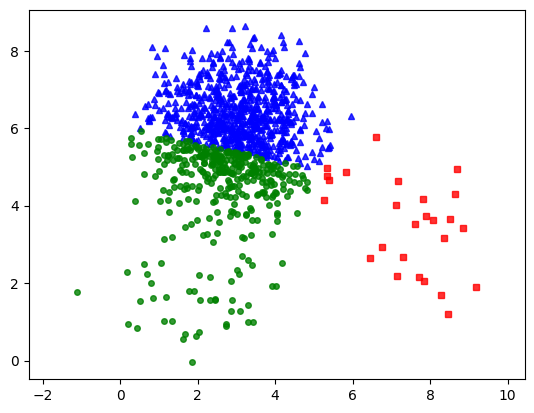

In [13]:
display_kmeans(X, kmeans.labels)

Từ kết quả trên ta có thể thấy thuật toán K-means clustering hoạt động kém hiệu quả do số lượng các nhãn phân bố không đồng đều (20, 50, 1000), chỉ có nhóm có tâm là (7.37, 3.53) là gần với kỳ vọng ban đầu nhất, hai nhóm còn lại đều bị phân lệch.

Như vậy kích thước giữa các cụm có ảnh hưởng lớn đến thuật toán K-means

**Assignment 3**

In [14]:
means = [[2, 2], [8, 3], [3, 6]]
cov1 = [[1, 0], [0, 1]]
cov2 = [[10, 0], [0, 1]]
N = 200

x0 = np.random.multivariate_normal(means[0], cov1, N)
x1 = np.random.multivariate_normal(means[1], cov1, N)
x2 = np.random.multivariate_normal(means[2], cov2, N)

X = np.concatenate((x0, x1, x2), axis = 0)

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

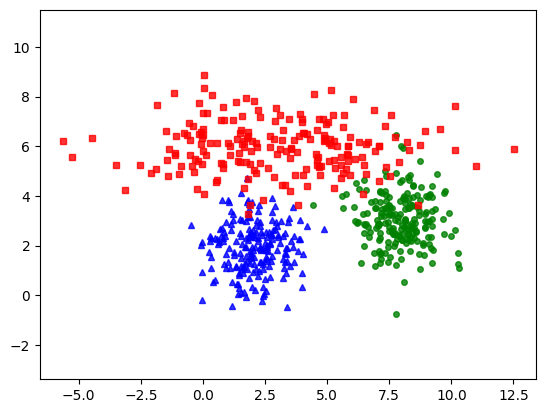

In [15]:
display_kmeans(X, original_label)

In [16]:
kmeans = Kmeans(n_clusters=3)
kmeans.fit(X)

In [17]:
print("Các tâm cụm: ")
print(kmeans.centroids)

Các tâm cụm: 
[[2.07217282 1.95114852]
 [7.76028063 3.54133823]
 [1.75982614 6.0919488 ]]


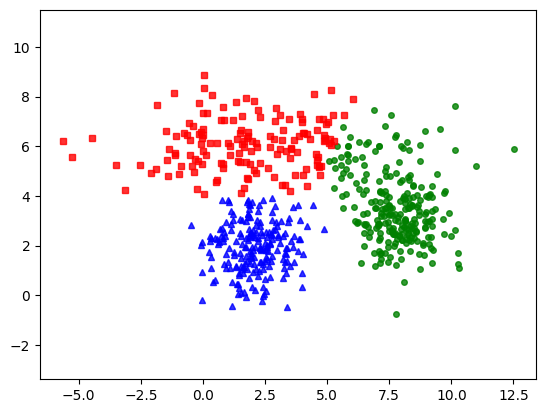

In [18]:
display_kmeans(X, kmeans.labels)

Từ kết quả trên, ta thấy thuật toán K-means clustering hoạt động không được hiệu quả lắm, do cov2 có phương sai lớn hơn dọc theo trục x nên dữ liệu có phân bố rộng hơn dẫn đến việc phân cụm dễ xảy ra nhầm lẫn hơn.

Nhóm có tâm (2, 2) là gần với kì vọng nhất, hai nhóm còn lại bị lệch đáng kể (có nhiều điểm của nhóm màu đỏ bị phân nhầm vào nhóm màu xanh lá cây)